In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates

In [2]:
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import adam_v2
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

**Get the Dataset**

In [3]:
df=pd.read_csv("HDFCBANK.csv",na_values=None,index_col='Date',parse_dates=True,infer_datetime_format=True)
df=df.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1)
df.head()
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11
2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12
2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12
2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12
2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12


**Print the shape of Dataframe  and Check for Null Values**

In [4]:
print("Dataframe Shape: ",df.shape)
print("Null Value Present: ",df.isnull().values.any())
df.info()

Dataframe Shape:  (5306, 11)
Null Value Present:  False
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      5306 non-null   object 
 1   Series      5306 non-null   object 
 2   Prev Close  5306 non-null   float64
 3   Open        5306 non-null   float64
 4   High        5306 non-null   float64
 5   Low         5306 non-null   float64
 6   Last        5306 non-null   float64
 7   Close       5306 non-null   float64
 8   VWAP        5306 non-null   float64
 9   Volume      5306 non-null   int64  
 10  Turnover    5306 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 497.4+ KB


In [5]:
df['Volume_lag_1d'] = df['Volume'].shift(1)

**Set Target Variable and Select the Features**

In [6]:
features = ['Prev Close','Open','High','Low','Last','VWAP','Volume_lag_1d']
#df['SMA_100'] = df['Close'].rolling(100, min_periods=100).mean()
df.dropna(inplace=True)
output_var = pd.DataFrame(df['Close'])
df[features].info()
output_var.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5305 entries, 2000-01-04 to 2021-04-30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prev Close     5305 non-null   float64
 1   Open           5305 non-null   float64
 2   High           5305 non-null   float64
 3   Low            5305 non-null   float64
 4   Last           5305 non-null   float64
 5   VWAP           5305 non-null   float64
 6   Volume_lag_1d  5305 non-null   float64
dtypes: float64(7)
memory usage: 331.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5305 entries, 2000-01-04 to 2021-04-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5305 non-null   float64
dtypes: float64(1)
memory usage: 82.9 KB


**Print the shape of Dataframe-Features  and Check for Null Values-Features**

In [7]:
print("Dataframe Shape: ",df[features].shape)
print("Null Value Present: ",df[features].isnull().values.any())

Dataframe Shape:  (5305, 7)
Null Value Present:  False


In [8]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5305 entries, 2000-01-04 to 2021-04-30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prev Close     5305 non-null   float64
 1   Open           5305 non-null   float64
 2   High           5305 non-null   float64
 3   Low            5305 non-null   float64
 4   Last           5305 non-null   float64
 5   VWAP           5305 non-null   float64
 6   Volume_lag_1d  5305 non-null   float64
dtypes: float64(7)
memory usage: 331.6 KB


**Plot the Close Value**

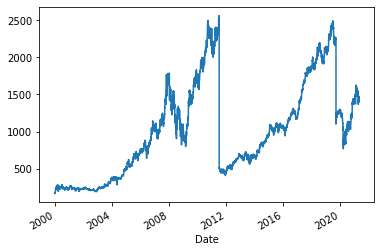

In [9]:
df['Close'].plot()

**Scaling**

In [10]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d
Date,,,,,,,
2000-01-04,0.002747,0.008258,0.006438,0.005841,0.004583,0.005641,0.000320
2000-01-05,0.004329,0.003266,0.002484,0.003338,0.002083,0.003237,0.001667
2000-01-06,0.001478,0.002434,0.000869,0.003463,0.002479,0.002922,0.001579
2000-01-07,0.002040,0.000000,0.001283,0.002149,0.003229,0.002237,0.000835
2000-01-10,0.002060,0.004472,0.004803,0.003338,0.001375,0.002652,0.000836


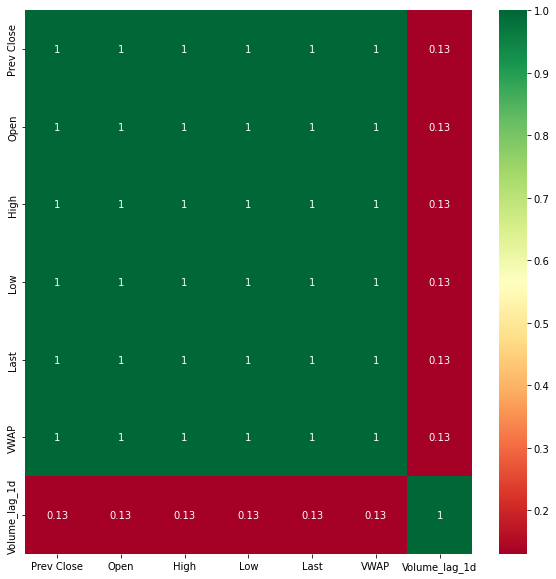

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(10,10))
sns.heatmap(feature_transform.corr(),cmap='RdYlGn',annot=True)
plt.show()


**Splitting to Training set and Test set**

In [12]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
  X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
  y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()



**Process the data for LSTM**

In [13]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

**Building the LSTM Model**

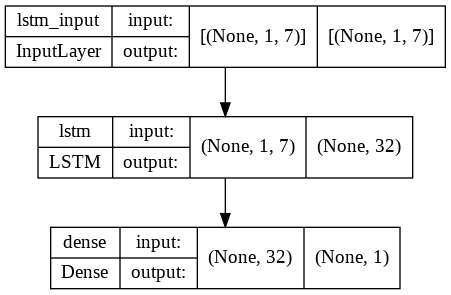

In [14]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

**Model Training**

In [15]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
603/603 [==============================] - 3s 2ms/step - loss: 1268169.6250
Epoch 2/100
603/603 [==============================] - 1s 2ms/step - loss: 1134356.7500
Epoch 3/100
603/603 [==============================] - 1s 2ms/step - loss: 955562.3750
Epoch 4/100
603/603 [==============================] - 1s 2ms/step - loss: 754080.1875
Epoch 5/100
603/603 [==============================] - 1s 2ms/step - loss: 554471.6250
Epoch 6/100
603/603 [==============================] - 1s 2ms/step - loss: 376284.4062
Epoch 7/100
603/603 [==============================] - 1s 2ms/step - loss: 232594.5000
Epoch 8/100
603/603 [==============================] - 1s 2ms/step - loss: 129375.9922
Epoch 9/100
603/603 [==============================] - 1s 2ms/step - loss: 65129.4805
Epoch 10/100
603/603 [==============================] - 1s 2ms/step - loss: 31454.5566
Epoch 11/100
603/603 [==============================] - 1s 2ms/step - loss: 15823.7100
Epoch 12/100
603/603 [====================

**LSTM Prediction**

In [16]:
y_pred= lstm.predict(X_test)

**EVALUATE MODEL PERFORMANCE FOR LSTM**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [17]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(y_pred,y_test),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


9.705

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [18]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(y_pred,y_test),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


159.011

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [19]:
import math
math.sqrt(mse)

12.609956383746932

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [20]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(y_pred,y_test),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


8.204

**Mean Absolute Percentage Error FOR TEST DATA**

In [21]:
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print("MAPE FOR TEST DATA IS")
np.round(mape,3)

MAPE FOR TEST DATA IS


33.401

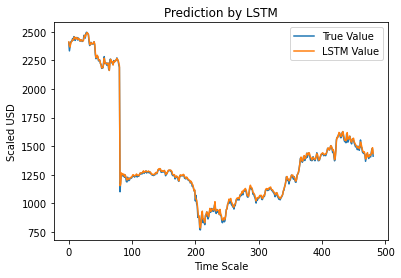

In [22]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [24]:
#!pip install autokeras

In [25]:
from autokeras import StructuredDataRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [26]:
df[features].head()

,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d
Date,,,,,,,
2000-01-04,170.00,182.00,183.45,171.00,174.00,174.99,33259.0
2000-01-05,173.80,170.00,173.90,165.00,168.00,169.20,168710.0
2000-01-06,166.95,168.00,170.00,165.30,168.95,168.44,159820.0
2000-01-07,168.30,162.15,171.00,162.15,170.75,166.79,85026.0
2000-01-10,168.35,172.90,179.50,165.00,166.30,167.79,85144.0


In [27]:
# basic data preparation
X = df[features].astype('float32')
y = output_var.astype('float32') 

In [28]:
# separate into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4244, 7) (1061, 7) (4244, 1) (1061, 1)


In [29]:
# Initialize the StructuredDataRegressor
reg = StructuredDataRegressor(max_trials=15,overwrite=True,metrics=['mae'])
# Search for the best model.
reg.fit(X_train.to_numpy(),y_train.to_numpy(), validation_split=0.2,epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/metrics_tracking.py:105: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


INFO:tensorflow:Oracle triggered exit
Epoch 1/100
133/133 [==============================] - 1s 5ms/step - loss: 1418698.1250 - mae: 1007.2139
Epoch 2/100
133/133 [==============================] - 1s 6ms/step - loss: 1384108.1250 - mae: 993.4410
Epoch 3/100
133/133 [==============================] - 1s 5ms/step - loss: 1210758.0000 - mae: 923.4690
Epoch 4/100
133/133 [==============================] - 1s 5ms/step - loss: 706997.3750 - mae: 704.9417
Epoch 5/100
133/133 [==============================] - 1s 5ms/step - loss: 177807.8125 - mae: 360.3170
Epoch 6/100
133/133 [==============================] - 1s 5ms/step - loss: 33036.9219 - mae: 147.4712
Epoch 7/100
133/133 [==============================] - 1s 5ms/step - loss: 1156.5342 - mae: 20.6409
Epoch 8/100
133/133 [==============================] - 1s 5ms/step - loss: 183.9089 - mae: 8.1743
Epoch 9/100
133/133 [==============================] - 1s 5ms/step - loss: 130.4328 - mae: 7.6395
Epoch 10/100
133/133 [=======================

In [31]:
# evaluate the model
loss, acc =reg.evaluate(X_train,y_train, verbose=0)
print('Accuracy: %.3f' % acc)
print('loss: %.3f' % loss)

Accuracy: 1.983
loss: 10.345


In [32]:
y_predict= reg.predict(X_test)

34/34 [==============================] - 0s 2ms/step


**EVALUATE MODEL PERFORMANCE for Autokeras**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [33]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(y_predict,y_test),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


2.59

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [34]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(y_predict,y_test),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


242.513

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [35]:
import math
math.sqrt(mse)

15.572828917325241

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [36]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(y_predict,y_test),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


1.102

**Mean Absolute Percentage Error FOR TEST DATA**

In [37]:
mape = np.mean(np.abs((y_test - y_predict)/y_test))*100
print("MAPE FOR TEST DATA IS")
np.round(mape,3)

MAPE FOR TEST DATA IS


Close    0.27
dtype: float32

In [38]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [39]:
all_data = pd.read_csv("HDFCBANK.csv")
all_data=all_data.drop(['Date','Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
all_data.head()
all_data.info()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11
1,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12
2,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12
3,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12
4,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prev Close  5306 non-null   float64
 1   Open        5306 non-null   float64
 2   High        5306 non-null   float64
 3   Low         5306 non-null   float64
 4   Last        5306 non-null   float64
 5   Close       5306 non-null   float64
 6   VWAP        5306 non-null   float64
 7   Volume      5306 non-null   int64  
 8   Turnover    5306 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 373.2 KB


In [40]:
all_data['Volume_lag_1d'] = all_data['Volume'].shift(1)
all_data.dropna(inplace=True)
x=all_data.drop(['Close','Turnover','Volume'],axis=1)
x.head()
x.info()

,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d
1,170.00,182.00,183.45,171.00,174.00,174.99,33259.0
2,173.80,170.00,173.90,165.00,168.00,169.20,168710.0
3,166.95,168.00,170.00,165.30,168.95,168.44,159820.0
4,168.30,162.15,171.00,162.15,170.75,166.79,85026.0
5,168.35,172.90,179.50,165.00,166.30,167.79,85144.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5305 entries, 1 to 5305
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prev Close     5305 non-null   float64
 1   Open           5305 non-null   float64
 2   High           5305 non-null   float64
 3   Low            5305 non-null   float64
 4   Last           5305 non-null   float64
 5   VWAP           5305 non-null   float64
 6   Volume_lag_1d  5305 non-null   float64
dtypes: float64(7)
memory usage: 331.6 KB


In [41]:
y=all_data['Close']
y.head()
y.shape

1    173.80
2    166.95
3    168.30
4    168.35
5    165.90
Name: Close, dtype: float64

(5305,)

In [42]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x_scld.head()
x_scld.describe()

,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d
0,0.002747,0.008258,0.006438,0.005841,0.004583,0.005641,0.000320
1,0.004329,0.003266,0.002484,0.003338,0.002083,0.003237,0.001667
2,0.001478,0.002434,0.000869,0.003463,0.002479,0.002922,0.001579
3,0.002040,0.000000,0.001283,0.002149,0.003229,0.002237,0.000835
4,0.002060,0.004472,0.004803,0.003338,0.001375,0.002652,0.000836


,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d
count,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000
mean,0.351255,0.351720,0.352839,0.349221,0.351884,0.351009,0.020868
std,0.264615,0.264333,0.265546,0.262636,0.264866,0.263744,0.039425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.131764,0.133369,0.132090,0.132015,0.132500,0.132300,0.003030
50%,0.321179,0.323460,0.325453,0.319272,0.322167,0.322114,0.009380
75%,0.523539,0.524929,0.526662,0.518213,0.525000,0.522716,0.021086
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
train_x,test_x,train_y,test_y=train_test_split(x_scld,y,test_size=0.20,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(4244, 7)

(1061, 7)

(4244,)

(1061,)

In [44]:
model = KNeighborsRegressor(n_neighbors=8)

In [45]:
model.fit(train_x,train_y)

KNeighborsRegressor(n_neighbors=8)

In [46]:
predicted_values=model.predict(test_x)
predicted_values


array([1162.525  , 1789.85625, 1243.64375, ...,  238.7125 ,  930.8    ,
        679.43125])

**STEP6-EVALUATE MODEL PERFORMANCE for KNeighborsRegressor**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [47]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


5.423

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [48]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(predicted_values,test_y),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


132.075

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [49]:
import math
math.sqrt(mse)

11.492388785626773

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [50]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(predicted_values,test_y),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


3.163

**Mean Absolute Percentage Error FOR TEST DATA**

In [51]:
mape = np.mean(np.abs((test_y - predicted_values)/test_y))*100
print("MAPE FOR TEST DATA IS")
np.round(mape,3)

MAPE FOR TEST DATA IS


0.593

In [53]:
!jupyter nbconvert StockMarketPrediction_LSTM_AutoKeras_KNN.ipynb

[NbConvertApp] Converting notebook StockMarketPrediction_LSTM_AutoKeras_KNN.ipynb to html
[NbConvertApp] Writing 494135 bytes to StockMarketPrediction_LSTM_AutoKeras_KNN.html
